# **Complete subsampling pipeline breakdown**

## 1) Start with our imports:

### The cell below contains the imports needed for `src/pipeline/pipeline.py`

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pathlib import Path

### The cell below contains the imports needed for `src/pipeline/audio_segmentor.py`

In [14]:
import soundfile as sf

### The cell below contains the imports needed for `src/cli.py`

In [15]:
import sys

# # append the path of the
# # parent directory
sys.path.append('..')
sys.path.append('../src/')
sys.path.append('../src/models/bat_call_detector/batdetect2/')

In [16]:
import src.subsampling as ss

## 2) Where does the subsampling pipeline start?

### Let's start with a directory of audio files to demonstrate how we used our `subsampling.py` script
##### This directory is stored locally and contains Audiomoth recordings along with a CONFIG.TXT

In [17]:
input_dir = f"{Path.home()}/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010"

### The below command is the command line invocation of the subsampling pipeline.

#### **Command: `python src/subsampling.py ~/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010 'Central_20220826_030000to130000' 'output_dir' 'output/tmp' 360 0.333`**

- `~/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010` is the folder path that contains our recordings. 
   - Our pipeline takes in a folder and generates detections for every recording in those folders
- `Central_20220826_030000to130000` is the tag of all linked output detections .csv.
   - For multiple consecutive recordings, we've labelled the output file as "...030000to130000.csv"
- `output_dir` is the repository folder where output detections .csv files will be saved.
- `output/tmp` is the repository folder where generated segment recordings will be saved and deleted after detections have been generated.

The location of the recordings was recorded from was Central Pond.

The recordings were recorded on 08/26/2022 from 03:00 to 13:00 UTC time

**We wrote in these details into the output detections .csv tag.**

In [18]:
ss.run_subsampling_detections_pipeline(input_dir, cycle_lengths=[360], percent_ons=[0.333], csv_tag='Central_20220826_030000to130000', output_dir='../output_dir', tmp_dir='../output/tmp')

,start_time,end_time,low_freq,high_freq,detection_confidence,event,input_file,Collide
0,566.2185,566.2350,25468.0,29847.0,0.606,Echolocation,20220826_033000.WAV,NaN
1,566.8605,566.8737,25468.0,31103.0,0.641,Echolocation,20220826_033000.WAV,NaN
2,567.1025,567.1171,26328.0,30373.0,0.582,Echolocation,20220826_033000.WAV,NaN
3,567.9165,567.9298,25468.0,30572.0,0.504,Echolocation,20220826_033000.WAV,NaN
4,568.4125,568.4268,25468.0,29356.0,0.505,Echolocation,20220826_033000.WAV,NaN
...,...,...,...,...,...,...,...,...
30881,741.5145,741.5202,44375.0,69790.0,0.532,Echolocation,20220826_120000.WAV,NaN
30882,742.1845,742.1917,46953.0,62888.0,0.503,Echolocation,20220826_120000.WAV,NaN
30883,742.6935,742.7001,47812.0,63072.0,0.522,Echolocation,20220826_120000.WAV,NaN
30884,742.8935,742.9016,46953.0,58803.0,0.527,Echolocation,20220826_120000.WAV,NaN


## 3) Output detections and generating comparisons

### a) Comparing effects with spectrograms

#### Below is main method to compare the effects of different duty cycling schemes by-sight

In [7]:
summer_audio_files = sorted(list(Path(input_dir).iterdir()))
date = "20220826"
location = "Central Pond"
plot_file_path = summer_audio_files[3]
plot_file = plot_file_path.name
plot_file_path

PosixPath('/Users/adityakrishna/Documents/Research/Symposium/Recordings/recover-20220828/UBNA_010/20220826_043000.WAV')

In [8]:
offset = 1800
audio_file = sf.SoundFile(plot_file_path)
fs = audio_file.samplerate
reftimes = np.array([0, 1800])
times = np.array([0, reftimes[1] - reftimes[0]])
audio_file.seek(int(reftimes[0]*fs))
audio_sec = audio_file.read(int((reftimes[1] - reftimes[0])*fs))
plt.rcParams.update({'font.size': 18})
plot_file

'20220826_043000.WAV'

In [9]:
detection_file = f"../output_dir/continuous__{location.split()[0]}_{date}_030000to130000.csv"

c_dets =pd.read_csv(detection_file)
c_dets

,start_time,end_time,low_freq,high_freq,detection_confidence,event,input_file,Collide
0,566.2185,566.2350,25468.0,29847.0,0.606,Echolocation,20220826_033000.WAV,NaN
1,566.8605,566.8737,25468.0,31103.0,0.641,Echolocation,20220826_033000.WAV,NaN
2,567.1025,567.1171,26328.0,30373.0,0.582,Echolocation,20220826_033000.WAV,NaN
3,567.9165,567.9298,25468.0,30572.0,0.504,Echolocation,20220826_033000.WAV,NaN
4,568.4125,568.4268,25468.0,29356.0,0.505,Echolocation,20220826_033000.WAV,NaN
...,...,...,...,...,...,...,...,...
30881,741.5145,741.5202,44375.0,69790.0,0.532,Echolocation,20220826_120000.WAV,NaN
30882,742.1845,742.1917,46953.0,62888.0,0.503,Echolocation,20220826_120000.WAV,NaN
30883,742.6935,742.7001,47812.0,63072.0,0.522,Echolocation,20220826_120000.WAV,NaN
30884,742.8935,742.9016,46953.0,58803.0,0.527,Echolocation,20220826_120000.WAV,NaN


In [10]:
cycle_length = 1800
percent_on = 0.167
save_detfilename = f'{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{plot_file.split(".")[0]}.csv'
save_dir = '../output_dir'
dets = ss.simulate_dutycycle_on_dets(c_dets, cycle_length, percent_on, save=False)
dets

,start_time,end_time,low_freq,high_freq,detection_confidence,event,input_file,Collide
418,7.0565,7.0764,22890.0,25882.0,0.557,Echolocation,20220826_040000.WAV,NaN
419,7.3185,7.3264,37500.0,44124.0,0.514,Echolocation,20220826_040000.WAV,NaN
420,7.5125,7.5198,38359.0,47752.0,0.542,Echolocation,20220826_040000.WAV,NaN
421,7.8125,7.8314,22890.0,27005.0,0.543,Echolocation,20220826_040000.WAV,NaN
422,7.9645,7.9724,38359.0,45520.0,0.508,Echolocation,20220826_040000.WAV,NaN
...,...,...,...,...,...,...,...,...
24054,101.2905,101.2982,42656.0,56744.0,0.593,Echolocation,20220826_100000.WAV,NaN
24055,101.7785,101.7897,43515.0,57204.0,0.531,Echolocation,20220826_100000.WAV,NaN
24056,101.8055,101.8110,34062.0,45580.0,0.546,Echolocation,20220826_100000.WAV,NaN
30779,59.7655,59.7727,48671.0,56040.0,0.585,Echolocation,20220826_113000.WAV,NaN


In [11]:
cycle_length = 360
percent_on = 0.167
save_detfilename = f'{int(cycle_length*percent_on)//60}min_every_{cycle_length//60}min__{location.split()[0]}_{plot_file.split(".")[0]}.csv'
dets2 = ss.simulate_dutycycle_on_dets(c_dets, cycle_length, percent_on, save=False)
dets2

,start_time,end_time,low_freq,high_freq,detection_confidence,event,input_file,Collide
62,1127.7625,1127.7802,22890.0,27196.0,0.508,Echolocation,20220826_033000.WAV,NaN
63,1128.7155,1128.7312,23750.0,27543.0,0.592,Echolocation,20220826_033000.WAV,NaN
64,1137.9415,1137.9534,25468.0,31117.0,0.585,Echolocation,20220826_033000.WAV,NaN
65,1138.8835,1138.8991,24609.0,30920.0,0.559,Echolocation,20220826_033000.WAV,NaN
66,1139.6555,1139.6689,24609.0,31239.0,0.506,Echolocation,20220826_033000.WAV,NaN
...,...,...,...,...,...,...,...,...
30881,741.5145,741.5202,44375.0,69790.0,0.532,Echolocation,20220826_120000.WAV,NaN
30882,742.1845,742.1917,46953.0,62888.0,0.503,Echolocation,20220826_120000.WAV,NaN
30883,742.6935,742.7001,47812.0,63072.0,0.522,Echolocation,20220826_120000.WAV,NaN
30884,742.8935,742.9016,46953.0,58803.0,0.527,Echolocation,20220826_120000.WAV,NaN


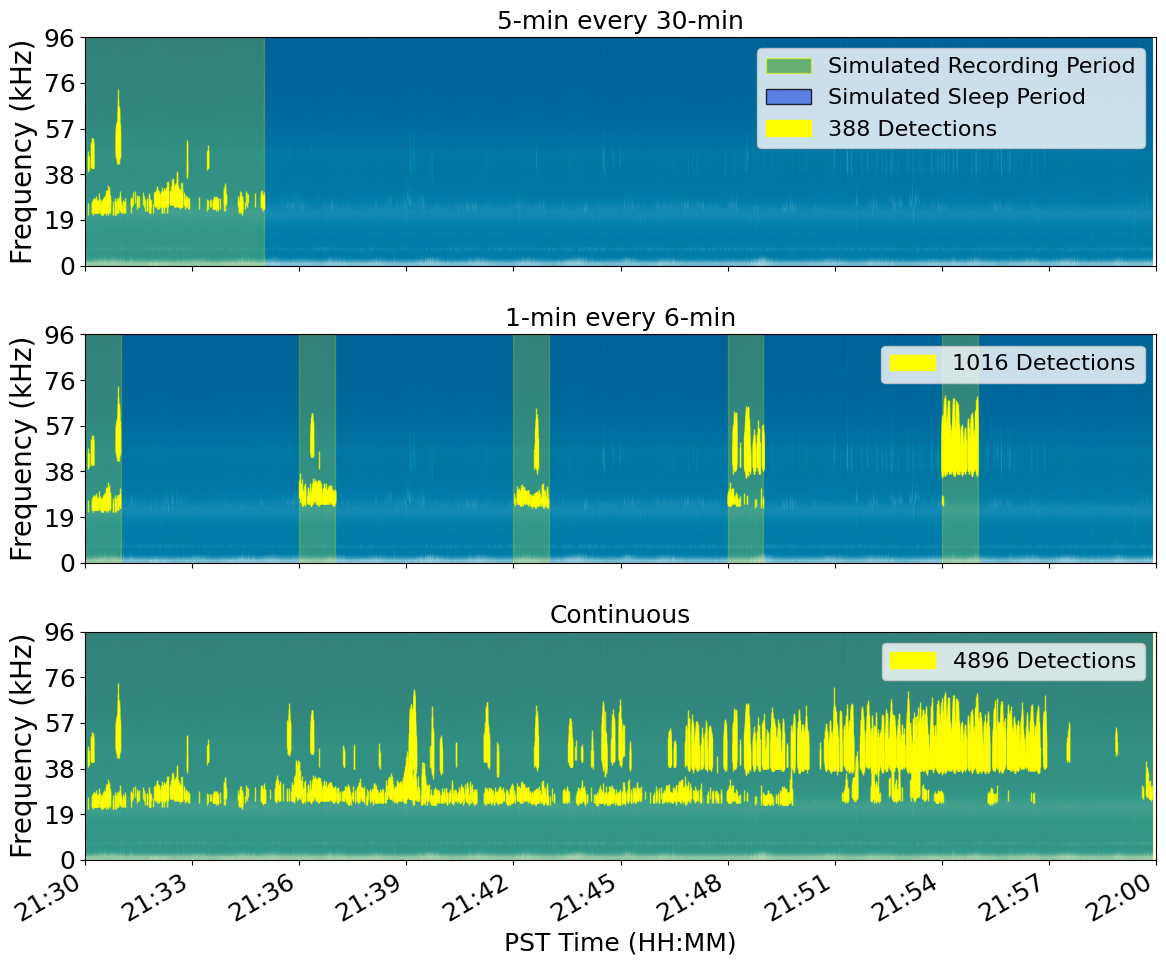

In [12]:
## Plot detections on audio
# Read in only section of audio with reftimes
# Zoom into section of audio with times

plt.figure(figsize=(12, 10))

cycle_length = 1800
percent_on = 0.167
plot_dets = dets[dets['input_file']==plot_file]
plt.subplot(311)
plt.title("5-min every 30-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=True, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=False, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, fs/2, 6), np.linspace(0, fs/2000, 6).astype('int'))

cycle_length = 360
percent_on = 0.167
plot_dets2 = dets2[dets2['input_file']==plot_file]
plt.subplot(312)
plt.title("1-min every 6-min", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets2, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, fs/2, 6), np.linspace(0, fs/2000, 6).astype('int'))

cycle_length = 1800
percent_on = 1.0
plot_dets_continuous = c_dets[c_dets['input_file']==plot_file]
plt.subplot(313)
plt.title("Continuous", fontsize=18)
ss.plt_msds_fromdf(location, plot_file, plot_dets_continuous, audio_sec, fs, offset, reftimes, times, cycle_length, percent_on, be_subplot=True, show_PST=True, show_legend=False, show_threshold=False, lf_threshold=45000, hf_threshold=35000, show_num_dets=True, det_linewidth=1, show_audio=False, show_spectrogram=True, spec_cmap='ocean', rm_dB=220, save=False)
plt.yticks(np.linspace(0, fs/2, 6), np.linspace(0, fs/2000, 6).astype('int'))

plt.tight_layout()
plt.show()